In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_evaluation.csv',header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.shape

(1728, 7)

In [4]:
df.tail()

,0,1,2,3,4,5,6
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [7]:
df[df.duplicated()]

,0,1,2,3,4,5,6


In [8]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
df[0].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [10]:
df[1].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [11]:
df[2].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [12]:
df[3].unique()

array(['2', '4', 'more'], dtype=object)

In [13]:
df[4].unique()

array(['small', 'med', 'big'], dtype=object)

In [14]:
df[5].unique()

array(['low', 'med', 'high'], dtype=object)

In [15]:
df[6].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
labelc = LabelEncoder()
df[0] = labelc.fit_transform(df[0])
df[1] = labelc.fit_transform(df[1])
df[2] = labelc.fit_transform(df[2])
df[3] = labelc.fit_transform(df[3])
df[4] = labelc.fit_transform(df[4])
df[5] = labelc.fit_transform(df[5])
df[6] = labelc.fit_transform(df[6])
df.head()

,0,1,2,3,4,5,6
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [17]:
df.describe()

,0,1,2,3,4,5,6
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


<AxesSubplot:>

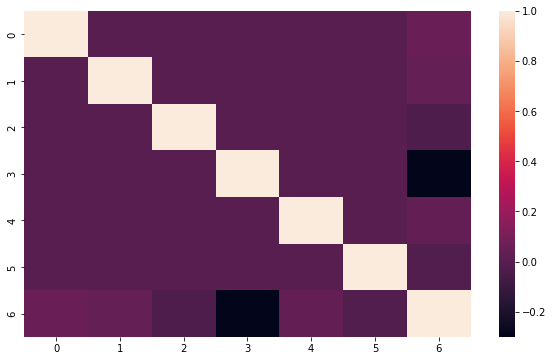

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

In [19]:
x = df.iloc[:,:-1] #independent variable

y = df.iloc[:,-1:] #dependent variable

In [20]:
#split data into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=1)

# Logistic Regression

In [21]:
#Here we use logistic Regression Algorithm to trian model
from sklearn.linear_model import LogisticRegression
logi_regg = LogisticRegression()
logi_regg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [22]:
#predict the test data
y_pred_logi = logi_regg.predict(x_test)

In [23]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_logi = accuracy_score(y_test,y_pred_logi)
print('Accuracy of model is : ',score_logi)

error_logi = confusion_matrix(y_test,y_pred_logi)
print("Correct and Incorrect input data :'\n'", error_logi)

Accuracy of model is :  0.6760665220535069
Correct and Incorrect input data :'
' [[ 50   0 243  21]
 [  8   0  42   0]
 [ 88   0 874   6]
 [ 12   0  28  11]]


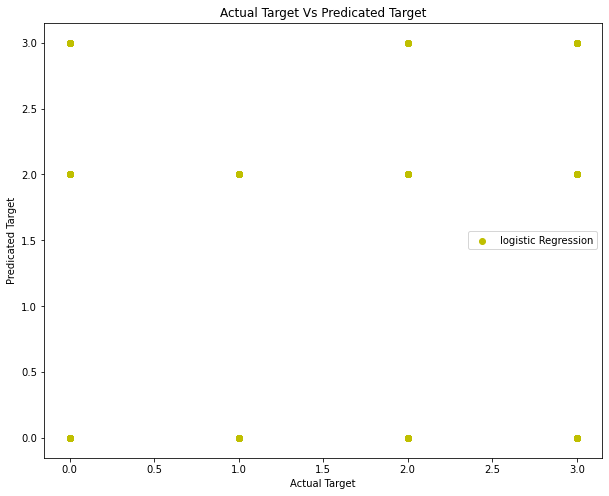

In [24]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_logi,c='y',label='logistic Regression')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# K-Nearest Neighbours

In [25]:
from sklearn.neighbors import KNeighborsClassifier
list1 = []
list2 = []
for i in range(3,50,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    from sklearn.metrics import accuracy_score
    y_pred = knn.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    list1.append(score)
    list2.append(i)
print(list1)
print(list2)
#print(i)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[0.8033261026753434, 0.789587852494577, 0.7845263919016631, 0.7686189443239335, 0.7606652205350687, 0.7447577729573391, 0.7389732465654375, 0.7259580621836587, 0.720173535791757, 0.7143890093998554, 0.7165582067968185, 0.7107736804049168, 0.7093275488069414, 0.7071583514099783, 0.7049891540130152, 0.7071583514099783, 0.7035430224150397, 0.7049891540130152, 0.6984815618221258, 0.7020968908170644, 0.6992046276211136, 0.7013738250180767, 0.7006507592190889, 0.7013738250180767]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [26]:
df = pd.DataFrame(list1,columns=['score'])
df['k_values'] = list2
df

,score,k_values
0,0.803326,3
1,0.789588,5
2,0.784526,7
3,0.768619,9
4,0.760665,11
5,0.744758,13
6,0.738973,15
7,0.725958,17
8,0.720174,19
9,0.714389,21


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k_values', ylabel='score'>

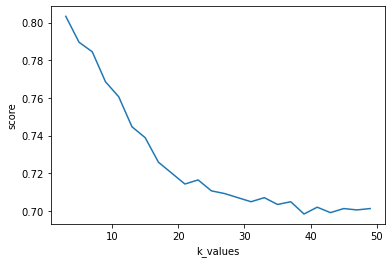

In [27]:
#here we plot the line graph
sns.lineplot(df.k_values,df.score)
#df.plot(x = 'k_values',y='score',kind='line')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


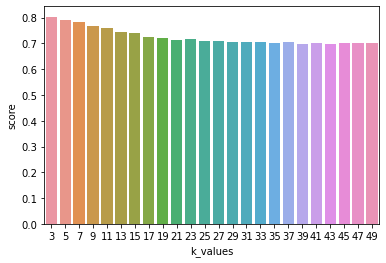

In [28]:
#df.plot(x = 'mse',y='k_values',kind='bar')
sns.barplot(df.k_values,df.score)
plt.show()

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred_knn = knn.predict(x_test)

In [31]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_knn = accuracy_score(y_test,y_pred_knn)
print('Accuracy of model is : ',score_knn)

error_knn = confusion_matrix(y_test,y_pred_knn)
print("Correct and Incorrect input data :'\n'", error_knn)

Accuracy of model is :  0.8033261026753434
Correct and Incorrect input data :'
' [[164  13 127  10]
 [ 17  22  11   0]
 [ 60   6 900   2]
 [ 16   4   6  25]]


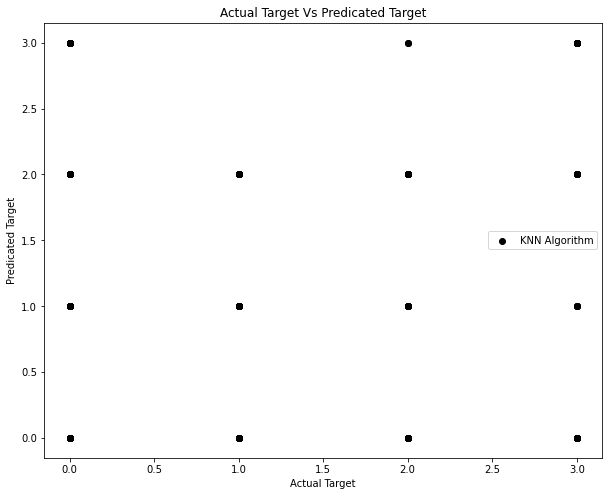

In [32]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_knn,c='k',label='KNN Algorithm')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Support Vector Machine Algorithm

In [33]:
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
kernel_name = ['linear', 'poly', 'rbf','sigmoid'] #{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
score_store = []
for i in kernel_name:
    cv_classification = svm.SVC(kernel=i)#SVC = support vector classifier
    cv_classification.fit(x_train,y_train)
    y_pred = cv_classification.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    score_store.append(score)
score_store

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[0.7165582067968185,
 0.7780187997107737,
 0.7693420101229211,
 0.6464208242950108]

In [34]:
df1 = pd.DataFrame(score_store,columns=['score'])
df1['kernal'] = kernel_name
df1

,score,kernal
0,0.716558,linear
1,0.778019,poly
2,0.769342,rbf
3,0.646421,sigmoid


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kernal', ylabel='score'>

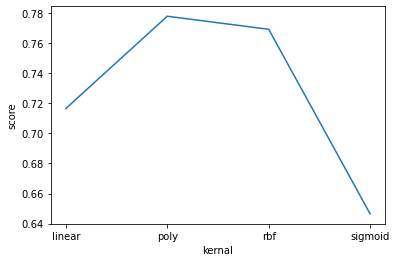

In [35]:
#here we plot the line graph
sns.lineplot(df1.kernal,df1.score)
#df1.plot(x = 'kernal',y='score',kind='line')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


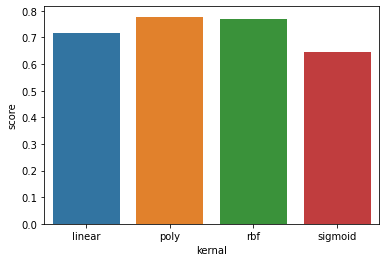

In [36]:
#df1.plot(x = 'score',y='k_values',kind='bar')
sns.barplot(df1.kernal,df1.score)
plt.show()

In [37]:
#Used support vector machine
cv_classification = svm.SVC(kernel='poly')    #SVC = support vector classifier
cv_classification.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='poly')

In [38]:
y_pred_svm = cv_classification.predict(x_test)

In [39]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_svm = accuracy_score(y_test,y_pred_svm)
print('Accuracy of model is : ',score_svm)

error_svm = confusion_matrix(y_test,y_pred_svm)
print("Correct and Incorrect input data :'\n'", error_svm)

Accuracy of model is :  0.7780187997107737
Correct and Incorrect input data :'
' [[143  23 135  13]
 [ 14  25  11   0]
 [ 79   1 885   3]
 [ 11   0  17  23]]


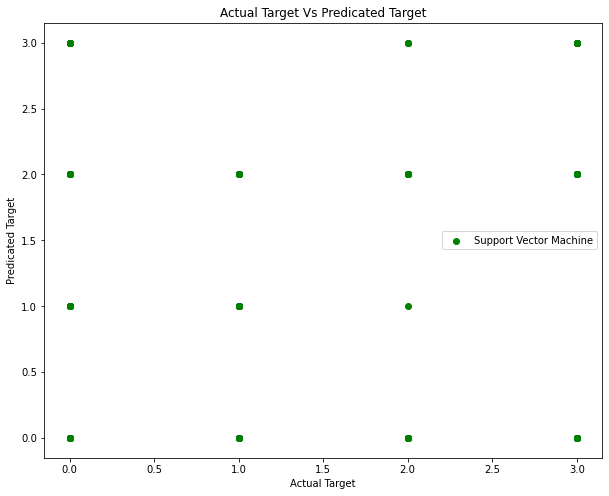

In [40]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_svm,c='g',label='Support Vector Machine')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Decision Tree Classification Algorithm

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy') # entropy = information gain
dt_classifier.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy')

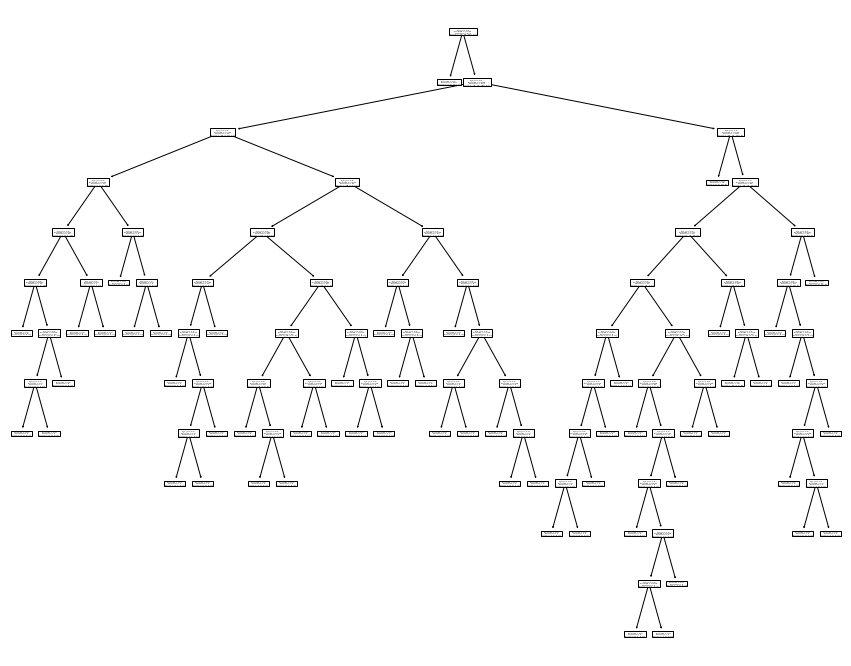

In [42]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
x=tree.plot_tree(dt_classifier)

In [43]:
y_pred_dt = dt_classifier.predict(x_test)

In [44]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy of model is : ',score_dt)

error_dt = confusion_matrix(y_test,y_pred_dt)
print("Correct and Incorrect input data :'\n'", error_dt)

Accuracy of model is :  0.8763557483731019
Correct and Incorrect input data :'
' [[224  36  46   8]
 [  4  43   3   0]
 [ 47   2 919   0]
 [ 13  12   0  26]]


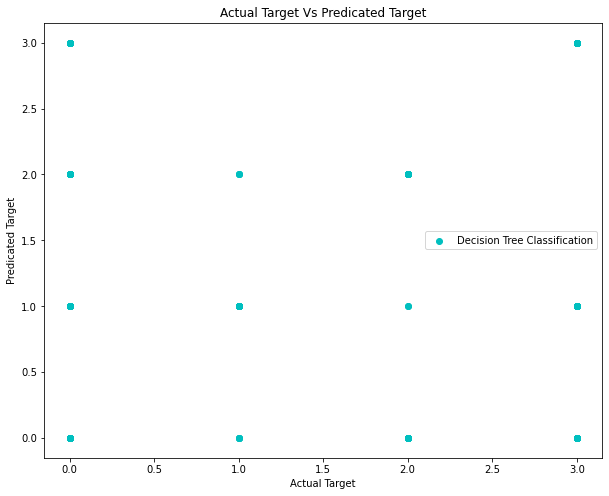

In [45]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_dt,c='c',label='Decision Tree Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Navie Bayer Classification Algorithm

In [46]:
from sklearn.naive_bayes import GaussianNB
NBCA = GaussianNB()
NBCA.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [47]:
y_pred_nb = NBCA.predict(x_test)

In [48]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_nb = accuracy_score(y_test,y_pred_nb)
print('Accuracy of model is : ',score_nb)

error_nb = confusion_matrix(y_test,y_pred_nb)
print("Correct and Incorrect input data :'\n'", error_nb)

Accuracy of model is :  0.6543745480838756
Correct and Incorrect input data :'
' [[ 63   1 124 126]
 [  7   6  16  21]
 [ 47   3 785 133]
 [  0   0   0  51]]


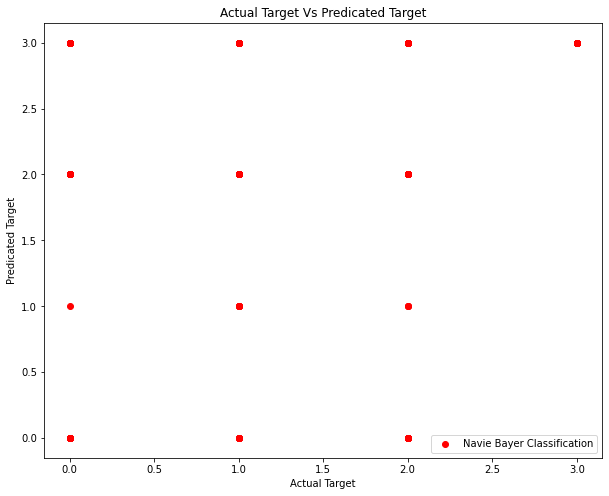

In [49]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_nb,c='r',label='Navie Bayer Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Random Forest Classification Algorithm

In [50]:
from sklearn.ensemble import RandomForestClassifier
RFAClass = RandomForestClassifier(n_estimators=50) #n_estimators less error maximum and more error less
RFAClass.fit(x_train,y_train)
RFAClass.fit(x_train,y_train)

C:\Users\vbkat\AppData\Local\Temp/ipykernel_13820/1543761169.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFAClass.fit(x_train,y_train)
C:\Users\vbkat\AppData\Local\Temp/ipykernel_13820/1543761169.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFAClass.fit(x_train,y_train)


RandomForestClassifier(n_estimators=50)

In [51]:
y_pred_rf = RFAClass.predict(x_test)

In [52]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy of model is : ',score_rf)

error_rf = confusion_matrix(y_test,y_pred_rf)
print("Correct and Incorrect input data :'\n'", error_rf)

Accuracy of model is :  0.8973246565437455
Correct and Incorrect input data :'
' [[238  19  50   7]
 [ 17  30   2   1]
 [ 29   0 939   0]
 [ 15   2   0  34]]


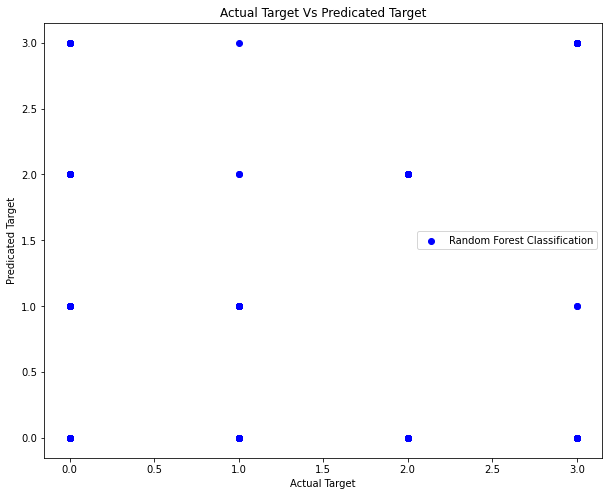

In [53]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_rf,c='b',label='Random Forest Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# All Classification Type algorithm result


In [54]:
print('Logistic Regression')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_logi = accuracy_score(y_test,y_pred_logi)
print('Accuracy of model is : ',score_logi)

error_logi = confusion_matrix(y_test,y_pred_logi)
print("Correct and Incorrect input data :'\n'", error_logi)


print('\n KNN Classification')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_knn = accuracy_score(y_test,y_pred_knn)
print('Accuracy of model is : ',score_knn)

error_knn = confusion_matrix(y_test,y_pred_knn)
print("Correct and Incorrect input data :'\n'", error_knn)

print('\n Support Vector Machine classification Algorithm')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_svm = accuracy_score(y_test,y_pred_svm)
print('Accuracy of model is : ',score_svm)

error_svm = confusion_matrix(y_test,y_pred_svm)
print("Correct and Incorrect input data :'\n'", error_svm)

print('\n Decision Tree Classifcation Algorithm')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy of model is : ',score_dt)

error_dt = confusion_matrix(y_test,y_pred_dt)
print("Correct and Incorrect input data :'\n'", error_dt)
      
      

print('\n Navie Bayes Classification Algorithms')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_nb = accuracy_score(y_test,y_pred_nb)
print('Accuracy of model is : ',score_nb)

error_nb = confusion_matrix(y_test,y_pred_nb)
print("Correct and Incorrect input data :'\n'", error_nb)
      
      
print('\n Random Forest classification Algorithm')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy of model is : ',score_rf)

error_rf = confusion_matrix(y_test,y_pred_rf)
print("Correct and Incorrect input data :'\n'", error_rf)

Logistic Regression
Accuracy of model is :  0.6760665220535069
Correct and Incorrect input data :'
' [[ 50   0 243  21]
 [  8   0  42   0]
 [ 88   0 874   6]
 [ 12   0  28  11]]

 KNN Classification
Accuracy of model is :  0.8033261026753434
Correct and Incorrect input data :'
' [[164  13 127  10]
 [ 17  22  11   0]
 [ 60   6 900   2]
 [ 16   4   6  25]]

 Support Vector Machine classification Algorithm
Accuracy of model is :  0.7780187997107737
Correct and Incorrect input data :'
' [[143  23 135  13]
 [ 14  25  11   0]
 [ 79   1 885   3]
 [ 11   0  17  23]]

 Decision Tree Classifcation Algorithm
Accuracy of model is :  0.8763557483731019
Correct and Incorrect input data :'
' [[224  36  46   8]
 [  4  43   3   0]
 [ 47   2 919   0]
 [ 13  12   0  26]]

 Navie Bayes Classification Algorithms
Accuracy of model is :  0.6543745480838756
Correct and Incorrect input data :'
' [[ 63   1 124 126]
 [  7   6  16  21]
 [ 47   3 785 133]
 [  0   0   0  51]]

 Random Forest classification Algorith

In [55]:
Algorithm = ['Logistic Regression','K-NN','Support VM','Decision Tree','Navie Bayer','Random Forest']
score = [score_logi,score_knn,score_svm,score_dt,score_nb,score_rf]
df_plot = pd.DataFrame(Algorithm,columns=['Algorithm_Name'])
df_plot['Accuracy_Score']=score
df_plot

,Algorithm_Name,Accuracy_Score
0,Logistic Regression,0.676067
1,K-NN,0.803326
2,Support VM,0.778019
3,Decision Tree,0.876356
4,Navie Bayer,0.654375
5,Random Forest,0.897325


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


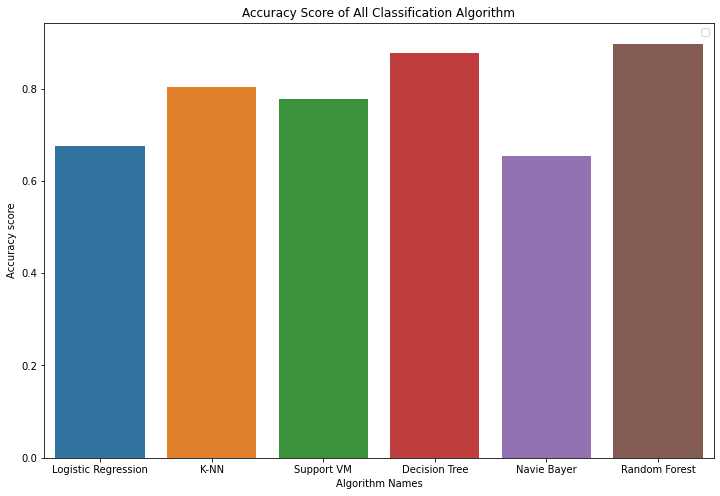

In [59]:
plt.figure(figsize=(12,8))
sns.barplot(df_plot.Algorithm_Name,df_plot.Accuracy_Score)
plt.xlabel('Algorithm Names')
plt.ylabel('Accuracy score')
plt.title('Accuracy Score of All Classification Algorithm')
plt.legend()

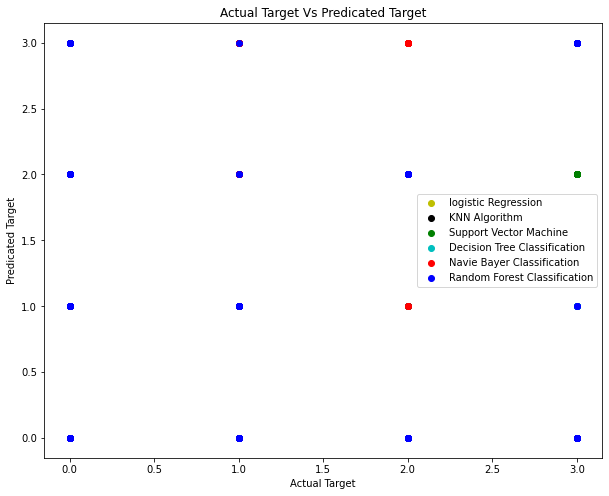

In [57]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_logi,c='y',label='logistic Regression')
plt.scatter(y_test,y_pred_knn,c='k',label='KNN Algorithm')
plt.scatter(y_test,y_pred_svm,c='g',label='Support Vector Machine')
plt.scatter(y_test,y_pred_dt,c='c',label='Decision Tree Classification')
plt.scatter(y_test,y_pred_nb,c='r',label='Navie Bayer Classification')
plt.scatter(y_test,y_pred_rf,c='b',label='Random Forest Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()